# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Devoir 2 - Régression linéaire ( 15 points )

Le présent devoir concerne les notions de la régression linéaire vues au Chapitre 2 du cours. Pour ce devoir, vous devez élaborer une analyse complète de régression à l'exercice 1 pour répondre aux questions de l'exercice 2.


## Devoir effectué par

Paré, Marie-Christine - 1901114

Roy, Fredérique - 1894397

**Déclaration d’intégrité relative au plagiat**

Nous certifions sur l’honneur :
- Que les résultats décrits dans ce rapport sont l’aboutissement de notre travail.
- Que nous sommes les auteurs de ce rapport.
- Que nous n'avons pas utilisé des sources ou résultats tiers sans clairement les citer et les référencer selon les règles bibliographiques préconisées.

Nous déclarons que ce travail ne peut être soupçonné de plagiat.



## Contexte : Glycémie des patients

Nous étudierons la glycémie sanguine (glu) en fonction de plusieurs variables explicatives : 
- l'âge du patient (age)
- l'indice de masse corporel du patient (bmi)
- le sexe du patient (sex)
- de la tension artérielle moyenne (map) 
- 5 indicateur sanguins (tc, ldl, hdl, tch et ltg). 


## Consignes

- Le devoir doit être remis sur Moodle **avant 23h59 lundi le 15 février 2020**. Les retards ne seront pas tolérés car le solutionnaire sera publié dès mardi.
- Le devoir a une pondération de 15%.
- Écrivez vos noms et vos matricules dans l'espace prévu à cet effet dans cette cellule.
- Vous pouvez compléter le devoir en équipe de deux personnes. Dans ce cas, un seul fichier par équipe doit être remis. Pour vous aider à trouver un coéquipier, le canal de discussion *#trouver_un_coéquipier* a été créé sur Slack.
- Le devoir doit être complété dans le présent calepin Jupyter en ajoutant autant de cellules de texte et de code que nécessaires. Vous remettrez ce fichier en format *.ipynb*. Le nom du fichier doit être *matricule1_matricule2_devoir2.ipynb*.
- N'utilisez que les librairies introduites à la cellule suivante.

## Chargement des libairies

In [44]:
using CSV 
using DataFrames
using Distributions
using Gadfly
using LinearAlgebra
using Statistics

## Chargement des données

In [45]:
data = CSV.read("diabetes.csv", DataFrame)
select!(data, Not(:prog))
first(data,5)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
,Int64,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,59,1,32.1,101.0,157,93.2,38.0,4.0,2.11,87
2,48,0,21.6,87.0,183,103.2,70.0,3.0,1.69,69
3,72,1,30.5,93.0,156,93.6,41.0,4.0,2.03,85
4,24,0,25.3,84.0,198,131.4,40.0,5.0,2.12,89
5,50,0,23.0,101.0,192,125.4,52.0,4.0,1.86,80


## Exercice 1 - Régression linéaire simple (5 points)

### (a) Estimez les coefficients de régression de la régression linéaire simple en utilisant la tension artérielle moyenne (map) comme variable explicative pour prédire la glycémie (gly).¶


L'ordonnée à l'origine estimée β̂₀ = 60.54670237176922
La pente de la droite de régression estimée β̂₁ = 0.32450691908643253


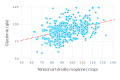

In [46]:
xmap = convert(Array{Float64},data[!,:map])
y = convert(Array{Float64},data[!,:glu])

function calculerCoefficientsDeterminationSimple(x, y)
    n = length(y)
    x̄ = mean(x)
    ȳ = mean(y)

    β̂₁ = sum( (x[i] - x̄)*(y[i] - ȳ) for i=1:n) / sum( (x[i] - x̄)^2 for i=1:n )
    β̂₀ = ȳ - β̂₁*x̄
    return [ β̂₀, β̂₁ ]
end

coefficient = calculerCoefficientsDeterminationSimple(xmap, y)
β̂₀ = coefficient[1]
β̂₁ = coefficient[2]
println("L'ordonnée à l'origine estimée β̂₀ = $β̂₀")
println("La pente de la droite de régression estimée β̂₁ = $β̂₁")


#Graphique 

Gadfly.set_default_plot_size(12cm, 8cm)
plot(data, x=:map, y=:glu, Geom.point, 
    intercept = [β̂₀], slope = [β̂₁], Geom.abline(color="red", style=:dash),
    Coord.cartesian(xmin=50, xmax=140),
    Guide.xlabel("Tension artérielle moyenne (map)"),
    Guide.ylabel("Glycémie (glu)"))

# C'est quoi les unités


### (b) Calculez le coefficient de détermination du modèle en (a).

In [47]:
function calculerR2(x, y)
    coefficient = calculerCoefficientsDeterminationSimple(x, y)
    β̂₀ = coefficient[1]
    β̂₁ = coefficient[2]
    ŷ = β̂₀ .+ β̂₁*x
    e = y - ŷ
    n = length(y)
    ȳ = mean(y)

    SST = sum( (y[i] - ȳ)^2 for i=1:n )
    SSE = sum( e.^2 )

    R² = 1 - SSE/SST 
    return R²
end
R²map=calculerR2(xmap, y)


println("Le coefficient de détermination R² = ",R²map)

Le coefficient de détermination R² = 0.15244004445789694


### (c) Est-ce que la tension artérielle moyenne possède un pouvoir prédictif significatif pour la glycémie ?

Justifiez bien votre réponse.

In [48]:
# Taille d'échantillon
n = length(y)

#nombre de variables explicatives
p = 1

#Calcul de SSR et SSE
coefficient= calculerCoefficientsDeterminationSimple(xmap, y)
β̂₀ = coefficient[1]
β̂₁ = coefficient[2]
ŷ = β̂₀ .+ β̂₁*xmap
e = y - ŷ
ȳ = mean(y)
SST = sum( (y[i] - ȳ)^2 for i=1:n )
SSE = sum( e.^2 )
SSR = SST - SSE

#Calculez la statistique observée permettant de tester l'importance de la régression
Fₒ = (n-p-1)/p * SSR/SSE

#Fonction de distribution. 
dist = FDist(p, n-p-1)

x = range(0, stop=100, length=1000)

# Calcule de la région critique pour le rejet de l'hypothèse nulle. 
# On utilise un risque de α=5 %. 

#le quantile d’ordre 95% de la loi de Fisher
seuil = quantile(dist, .975)
println("seuil=",seuil)

if Fₒ > seuil
    println("On rejette l'hypothèse nulle.")
else
    println("On ne rejette pas l'hypothèse nulle.")
end


seuil=5.058449153792086
On rejette l'hypothèse nulle.


### (d) Si un patient a une tension artérielle moyenne de 100, calculez un intervalle de confiance de niveau 95% pour sa glycémie.

In [49]:
x0 =100

X0 = vcat(ones(1), x0)
n = length(y)
X = hcat(ones(n), xmap)
p = 1
V = inv(xmap'xmap)
q = quantile(TDist(n-p-1),.975)

#0.975 (erreur ok chill)
# Estimation de la variance de l'erreur
σ̂²  = SSE/(n-p-1)

se = q* sqrt.(σ̂² * (1+X0'*inv(X'*X)*X0))

Y0 = β̂₀ .+ β̂₁*x0

a = round.( Y0 - se, digits=3)
b = round.(Y0 + se, digits=3)

println("L'intervalle de confiance de Ŷ₀ est [$(a) , $(b)]")



L'intervalle de confiance de Ŷ₀ est [72.145 , 113.849]


### (e) Considérez l'indice de masse corporel comme (bmi) comme seule variable explicative. Laquelle des deux variables entre bmi et map possède le plus grand pouvoir prédictif de la glycémie ?

Justifiez bien votre réponse.

L'indice de masse corporel (Rbmi² = 0.1510721376581331) a un plus faible pouvoir prédictif que la tension artérielle (Rmap² = 0.15244004445789694) pour prédire la glycémie


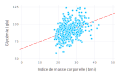

In [50]:
xbmi = convert(Array{Float64},data[!,:bmi])
R²bmi=calculerR2(xbmi, y)

if (R²bmi>R²map)
    println("L'indice de masse corporel (Rbmi² = $(R²bmi)) a un plus grand pouvoir prédictif que la tension artérielle (Rmap² = $(R²map)) pour prédire la glycémie")
elseif (R²bmi<R²map)
    println("L'indice de masse corporel (Rbmi² = $(R²bmi)) a un plus faible pouvoir prédictif que la tension artérielle (Rmap² = $(R²map)) pour prédire la glycémie")
end

#Calcul des coefficients de détermination 
coefficient= calculerCoefficientsDeterminationSimple(xbmi, y)
β̂₀ = coefficient[1]
β̂₁ = coefficient[2]

#Graphique
Gadfly.set_default_plot_size(12cm, 8cm)
plot(data, x=:bmi, y=:glu, Geom.point, 
    intercept = [β̂₀], slope = [β̂₁], Geom.abline(color="red", style=:dash),
    Coord.cartesian(xmin=0, xmax=50),
    Guide.xlabel("Indice de masse corporelle (bmi)"),
    Guide.ylabel("Glycémie (glu)"))



## Exercice 2 - Effet du sexe (5 points)

### (a) Ajoutez le sexe comme variable explicative au modèle de l'exercice 1(a). Est-ce que le sexe possède un pouvoir prédictif significatif de la glycémie ?

In [51]:
xsex =convert(Array{Float64},data[!,:sex,])
X= hcat(ones(n),xmap,xsex)

#Calcul du  R² du modèle de régression linéaire multiple (:map et :sex)
function calculerR2multiple(X, y)
    β̂ = (X'X)\X'y
    e = y - X*β̂
    ȳ = mean(y)
    SST = sum( (y[i] - ȳ)^2 for i=1:n )
    SSE = e'e

    R² = 1 - SSE/SST
    return R²
end 
R²map_sex=calculerR2multiple(X, y)

println("R² = $R²map_sex")

#Calculez les intervalles de confiance à 95 % pour β
β̂ = X\y
e = y - X*β̂
SSE = e'e
σ̂²  = SSE/(n-p-1)
V = inv(X'X)
q = quantile(TDist(n-p-1),.975)
se = q * sqrt.(σ̂² * diag(V))
a = round.(β̂ - se, digits=3)
b = round.(β̂ + se, digits=3)

println("β_$(0) ∈ [$(a[1]) , $(b[1])]")
println("β_map ∈ [$(a[2]) , $(b[2])]")
println("β_sex ∈ [$(a[3]) , $(b[3])]")

R² = 0.16624785916718843
β_0 ∈ [54.698 , 68.377]
β_map ∈ [0.227 , 0.374]
β_sex ∈ [0.758 , 4.815]


### (b) Interprétez les estimations des coefficients de régression que vous avez obtenues en 2 (b).

In [52]:
println("β̂₀ = $(β̂[1] )")
println("β̂_map = $(β̂[2] )")
println("β̂_sex = $(β̂[3] )")

β̂₀ = 61.537043941982176
β̂_map = 0.3002564058116285
β̂_sex = 2.7862809091853085


### (c) Choix du modèle bidimensionnel

Considérez le modèle de régression utilisant l'indice de masse corporelle et le sexe comme variables explicatives. Est-ce un meilleur modèle que celui de l'exercice 2(a) ? Est-ce cohérent avec la réponse du 1(e) ? Justifiez.

In [53]:
X = hcat(ones(n), xsex, xbmi)


R²bmi_sex = calculerR2multiple(X, y)
println("R² = $R²bmi_sex")


R² = 0.1815385457049684


## Exercice 3 - Modèle tridimensionnel (5 points)

Considérez maintenant le modèle de régression linéaire utilisants les variables `:map`, `:bmi` et `:sex`.

### (a) Est-ce que l'hypothèse de linéarité semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

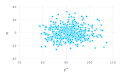

In [54]:
X = hcat(ones(n), xsex, xbmi, xmap)
β̂ = (X'X)\X'y

ŷ = X*β̂ 
e = (y- ŷ)
plot(x=ŷ, y=e, Geom.point, Guide.xlabel("y^"),
    Guide.ylabel("e"))

### (b) Est-ce que l'hypothèse d'homoscédasticité de la variance semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

### (c) Y a-t-il présence de multicolinéarité ?

Justifiez bien votre réponse. S'il y a multicolinéarité, que proposeriez vous pour limiter son effet ?

In [55]:
#Déterminer le VIF pour (:map, :bmi), (:map, :sex), (:bmi, :sex)
function VIF(x1, X_1)
    R2 = calculerR2multiple(X_1, x1)
    VIF = 1/(1-R2)
    return VIF
end

Xmap = hcat(ones(n), xsex, xbmi)
Xbmi = hcat(ones(n), xsex, xmap)
Xsex = hcat(ones(n), xmap, xbmi)


VIFmap = VIF(xmap, Xmap)
VIFsex = VIF(xsex, Xsex)
VIFbmi = VIF(xbmi, Xbmi)

println("VIF pour :map = $VIFmap")
println("VIF pour :sex = $(VIFsex)")
println("VIF pour :bmi = $(VIFbmi)")


VIF pour :map = 1.2486585796005725
VIF pour :sex = 1.061722649572818
VIF pour :bmi = 1.1853565961908525
